In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
iris=datasets.load_iris()
X=iris.data
y=iris.target


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
abc=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f"Accuracy:{metrics.accuracy_score(y_test,y_pred)}")

Accuracy:0.9111111111111111


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
abc=AdaBoostClassifier(n_estimators=50,estimator=NB,learning_rate=1)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Accuracy:{metrics.accuracy_score(y_test,y_pred)}")

Accuracy:0.9333333333333333


K fold cross validation


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
model=AdaBoostClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores=cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.798 (0.034)


In [ ]:
X[0]


array([ -3.47224758,   1.95378146,   0.04875169,  -0.91592588,
        -3.54022468,   1.96405547,  -7.72564954,  -2.64787168,
        -1.81726906,  -1.67104974,   2.33762043,  -4.30273117,
         0.4839841 ,  -1.28253034, -10.6704077 ,  -0.7641103 ,
        -3.58493721,   2.07283886,   0.08385173,   0.91461126])

In [ ]:
row=[[ -3.47224758,   1.95378146,   0.04875169,  -0.91592588,
        -3.54022468,   1.96405547,  -7.72564954,  -2.64787168,
        -1.81726906,  -1.67104974,   2.33762043,  -4.30273117,
         0.4839841 ,  -1.28253034, -10.6704077 ,  -0.7641103 ,
        -3.58493721,   2.07283886,   0.08385173,   0.91461126]]
model.fit(X,y)
yhat=model.predict(row)
model.fit(X,y)
print(f"Predicted class:{yhat[0]}")

Predicted class:0


hyper parameter tuning

1:0.7983333333333335
2:0.853
3:0.8936666666666665
4:0.913
5:0.924
6:0.9303333333333335
7:0.9319999999999999
8:0.9333333333333335
9:0.9329999999999999
10:0.9359999999999998


<ipython-input-31-e457de7c161d>:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results,labels=names)


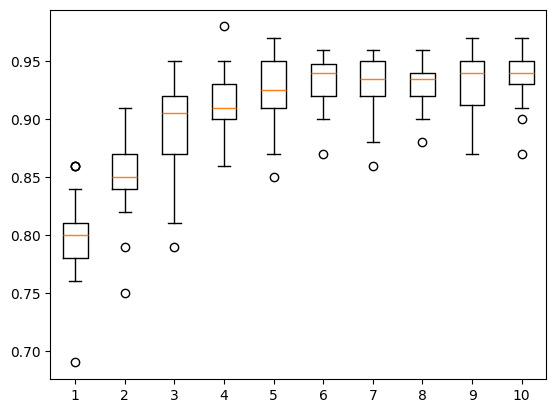

In [ ]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
def get_dataset():
  X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
  return X,y
def get_models():
  models=dict()
  for i in range (1,11):
    base=DecisionTreeClassifier(max_depth=i)
    models[str(i)]=AdaBoostClassifier(estimator=base)
  return models
def  evaluate_model(model,X,y):
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores =cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
  return scores
X,y=get_dataset()
models=get_models()

results,names=list(),list()
for name,model in models.items():
  scores=evaluate_model(model,X,y)
  results.append(scores)
  names.append(name)
  print(f"{name}:{mean(scores)}")
pyplot.boxplot(results,labels=names)
pyplot.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
X,y=make_classification()
model=AdaBoostClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_param = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search=GridSearchCV(estimator=model,param_grid=grid_param,n_jobs=-1,cv=cv,scoring='accuracy')
grid_result=grid_search.fit(X,y)
print("Best:%f using %s"%(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev,param in zip(means,stds,params):
  print("%f (%f) with: %r"%(mean,stdev,param))

Best:0.836667 using {'learning_rate': 0.01, 'n_estimators': 50}
0.836667 (0.113969) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.833333 (0.110554) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.823333 (0.111604) with: {'learning_rate': 0.01, 'n_estimators': 150}
0.810000 (0.110604) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.800000 (0.112546) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.796667 (0.119675) with: {'learning_rate': 0.1, 'n_estimators': 150}
0.780000 (0.127541) with: {'learning_rate': 1, 'n_estimators': 50}
0.790000 (0.113578) with: {'learning_rate': 1, 'n_estimators': 100}
0.783333 (0.115710) with: {'learning_rate': 1, 'n_estimators': 150}


1: -0.0110
2: -0.0111
3: -0.0109
4: -0.0109
5: -0.0109
6: -0.0110
7: -0.0109
8: -0.0109
9: -0.0109
10: -0.0109


<ipython-input-56-6dc43d3a4212>:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


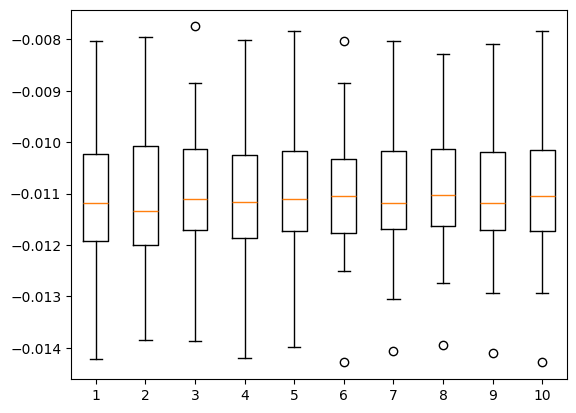

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from matplotlib import pyplot as plt
import numpy as np

def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=6)
    return X, y

def get_models():
    models = dict()
    for i in range(1, 11):
        base = LinearRegression()  # Changed from LogisticRegression to LinearRegression
        models[str(i)] = AdaBoostRegressor(estimator=base, n_estimators=i)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f"{name}: {np.mean(scores):.4f}")

plt.boxplot(results, labels=names)
plt.show()
